<a href="https://colab.research.google.com/github/njones61/ce544/blob/main/docs/unit2/11_reliability/reliability_calc_KEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reliability Calculations

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

# get name of uploaded file
csv_file_name = list(uploaded.keys())[0]

# import csv to dataframe
df = pd.read_csv(csv_file_name)

Saving bay_mud_data.csv to bay_mud_data.csv


In [ ]:
df.head()

,Depth,Test,Su [tsf]
0,10.5,UU,0.25
1,10.5,UC,0.22
2,11.5,UU,0.23
3,11.5,UC,0.25
4,14.0,UU,0.20


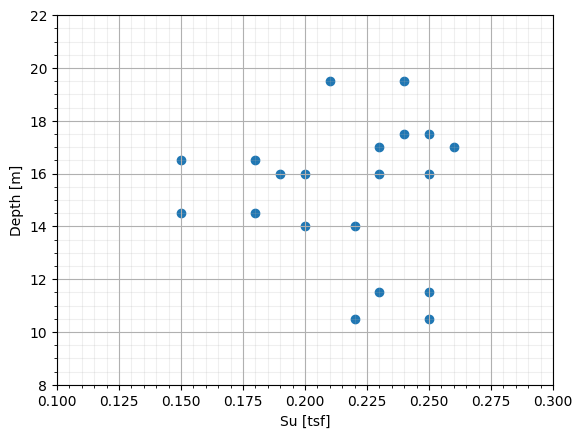

In [ ]:
# Make a scatter plot of Depth values vs Su [tsf], plot depths in descending order
plt.scatter(df['Su [tsf]'], df['Depth'])
plt.xlabel('Su [tsf]')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()
plt.xlim(0.1, 0.3)
plt.ylim(8, 22)
plt.grid(True, which='both')
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)
plt.show()

## 1) Calculate standard deviation, coefficient of variation

In [ ]:
# Calculate stddev, mean, COV of Su
stdev = df['Su [tsf]'].std()
mean = df['Su [tsf]'].mean()
cov = stdev / mean
print(f"Standard Deviation: {stdev:.4f}")
print(f"Mean: {mean:.3f}")
print(f"Covariance: {cov:.2%}")

Standard Deviation: 0.0331
Mean: 0.216
Covariance: 15.30%


## 2) Graphical/Simplified method of calculating standard deviation

In [ ]:
# Estimate a max and min value using the points on the graph
max = 0.28
min = 0.12

In [ ]:
# Use the 3sigma method to backcalculate the standard deviation (factor of 6)
stdev_6 = (max - min) / 6
print(f"Standard Deviation: {stdev_6:.4f}")

Standard Deviation: 0.0267


In [ ]:
# Recalculate using a factor of 4
stdev_4 = (max - min) / 4
print(f"Standard Deviation: {stdev_4:.4f}")

Standard Deviation: 0.0400


# 3) Compute probability of failure from FMLV and COVF

In [ ]:
# Calculate Log-Normal Reliability Index (bLN)
Fmlv = 1.17
COVf = 0.158
bln = np.log(Fmlv/((1+COVf**2)**0.5))/((np.log((1 + COVf**2)))**0.5)
print(f"Log-Normal Reliability Index (bLN): {bln:.3f}")

Log-Normal Reliability Index (bLN): 0.921


In [ ]:
# Calculate reliability and probability of failure
from statistics import NormalDist
reliability = NormalDist().cdf(bln)
print(f"Reliability: {reliability:.1%}")
prob_fail = 1 - reliability
print(f"Probability of Failure: {prob_fail:.1%}")


Reliability: 82.2%
Probability of Failure: 17.8%
